# Radon transform on shifted 'apexes'

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pylops
import matplotlib.pyplot as plt

# Activate to check numba parallel diagnostic
#os.environ['NUMBA_PARALLEL_DIAGNOSTICS'] = '4'

## Zero offset hyperbola

In [2]:
par = {'ox':-200, 'dx':2, 'nx':201,
       'oy':-100, 'dy':2, 'ny':101,
       'ot':0, 'dt':0.004, 'nt':301,
       'f0': 20, 'nfmax': 210}

# Create axis
t, t2, x, y = pylops.utils.seismicevents.makeaxis(par)

# Create wavelet
wav = pylops.utils.wavelets.ricker(np.arange(41) * par['dt'],
                                   f0=par['f0'])[0]

vrms = [500, 400, 200]
t0 = [0.2, 0.4, 0.5]
amp = [1., 0.6, -2.]

mhyp, mhypwav = pylops.utils.seismicevents.hyperbolic2d(x, t, t0,
                                                        vrms, amp, wav)

In [3]:
npx = 101
px = np.linspace(100, 600, npx)

RHop = pylops.signalprocessing.Radon2D(t, x, px * (par['dt']/par['dx'])**2, centeredh=False,
                                       kind='hyperbolic', interp=False,
                                       engine='numpy')


rhypwav = RHop.H * mhypwav.ravel()
rhypwav = rhypwav.reshape(npx, par['nt'])

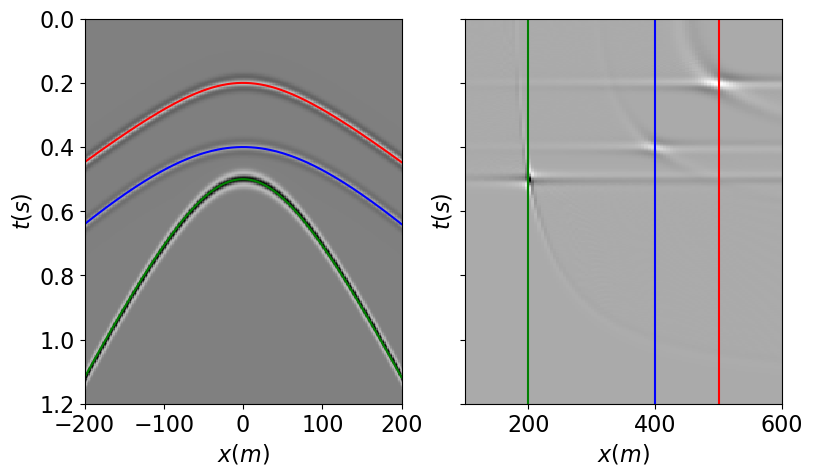

In [4]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(9, 5))
axs[0].imshow(mhypwav.T, aspect='auto', interpolation='nearest',
              vmin=-2, vmax=2, cmap='gray',
              extent=(x.min(), x.max(), t.max(), t.min()))
axs[0].plot(x, np.sqrt(t0[0]**2+x**2/vrms[0]**2), 'r')
axs[0].plot(x, np.sqrt(t0[1]**2+x**2/vrms[1]**2), 'b')
axs[0].plot(x, np.sqrt(t0[2]**2+x**2/vrms[2]**2), 'g')
axs[0].set_xlabel(r'$x(m)$')
axs[0].set_ylabel(r'$t(s)$')

axs[1].imshow(rhypwav.T, aspect='auto', interpolation='nearest',
              cmap='gray', extent=(px.min(), px.max(), t.max(), t.min()))
axs[1].axvline(vrms[0], color='r')
axs[1].axvline(vrms[1], color='b')
axs[1].axvline(vrms[2], color='g')
axs[1].set_xlabel(r'$x(m)$')
axs[1].set_ylabel(r'$t(s)$')
axs[1].set_ylim(t[-1], t[0]);

## Middle offset hyperbola

In [5]:
par = {'ox':0, 'dx':2, 'nx':201,
       'oy':0, 'dy':2, 'ny':101,
       'ot':0, 'dt':0.004, 'nt':301,
       'f0': 20, 'nfmax': 210}

# Create axis
t, t2, x, y = pylops.utils.seismicevents.makeaxis(par)

# Create wavelet
wav = pylops.utils.wavelets.ricker(np.arange(41) * par['dt'],
                                   f0=par['f0'])[0]

vrms = [500, 400, 200]
t0 = [0.2, 0.4, 0.5]
amp = [1., 0.6, -2.]

mhyp, mhypwav = pylops.utils.seismicevents.hyperbolic2d(x, t, t0, vrms, amp, wav)

In [6]:
npx = 101
px = np.linspace(100, 600, npx)

RHop = pylops.signalprocessing.Radon2D(t, x, px * (par['dt']/par['dx'])**2, centeredh=False,
                                       kind='hyperbolic', interp=False,
                                       engine='numpy')


rhypwav = RHop.H * mhypwav.ravel()
rhypwav = rhypwav.reshape(npx, par['nt'])

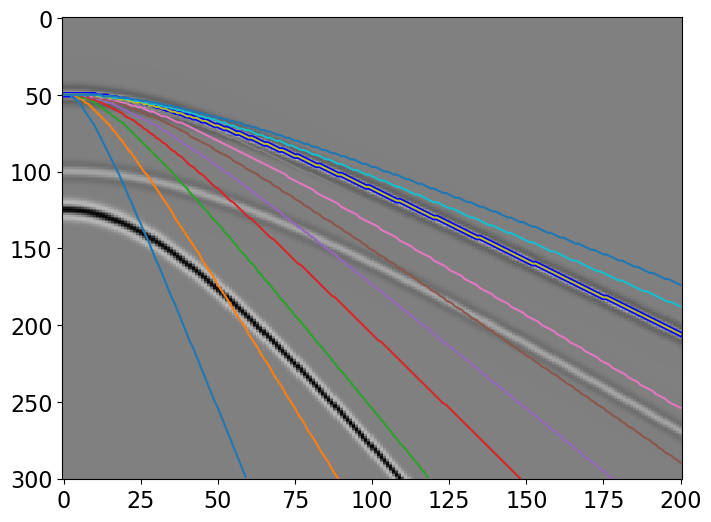

In [7]:
tevent = np.sqrt(t0[0] ** 2 + x ** 2 / vrms[0] ** 2)
tevent = (tevent - t[0]) / par['dt']
itevent = tevent.astype(int)

plt.imshow(mhypwav.T, aspect='auto', interpolation='nearest',
           vmin=-2, vmax=2, cmap='gray')
plt.plot(itevent, 'b', lw=4)
for i in range(0, npx, 10):
    plt.plot(RHop.table[i,50]);

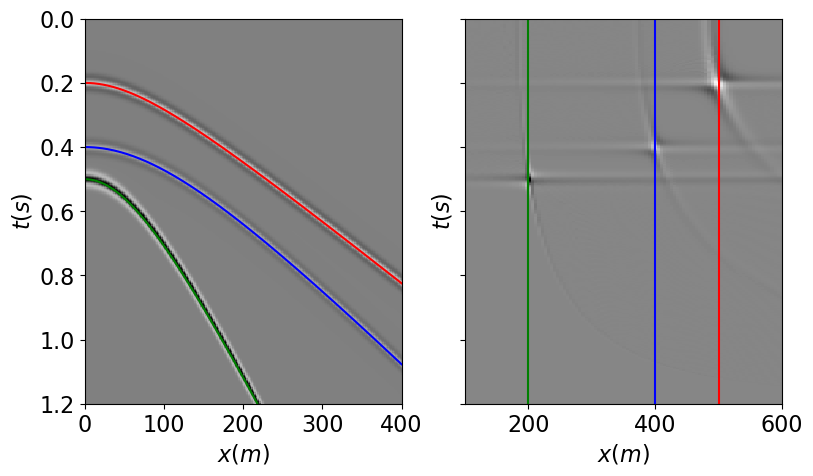

In [8]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(9, 5))
axs[0].imshow(mhypwav.T, aspect='auto', interpolation='nearest',
              vmin=-2, vmax=2, cmap='gray',
              extent=(x.min(), x.max(), t.max(), t.min()))
axs[0].plot(x, np.sqrt(t0[0]**2+x**2/vrms[0]**2), 'r')
axs[0].plot(x, np.sqrt(t0[1]**2+x**2/vrms[1]**2), 'b')
axs[0].plot(x, np.sqrt(t0[2]**2+x**2/vrms[2]**2), 'g')
axs[0].set_xlabel(r'$x(m)$')
axs[0].set_ylabel(r'$t(s)$')

axs[1].imshow(rhypwav.T, aspect='auto', interpolation='nearest',
              cmap='gray', extent=(px.min(), px.max(), t.max(), t.min()))
axs[1].axvline(vrms[0], color='r')
axs[1].axvline(vrms[1], color='b')
axs[1].axvline(vrms[2], color='g')
axs[1].set_xlabel(r'$x(m)$')
axs[1].set_ylabel(r'$t(s)$')
axs[1].set_ylim(t[-1], t[0]);

## Any shifted hyperbola

In [9]:
par = {'ox':-50, 'dx':2, 'nx':201,
       'oy':0, 'dy':2, 'ny':101,
       'ot':0, 'dt':0.004, 'nt':201,
       'f0': 20, 'nfmax': 210}

# Create axis
t, t2, x, y = pylops.utils.seismicevents.makeaxis(par)

# Create wavelet
wav = pylops.utils.wavelets.ricker(np.arange(41) * par['dt'],
                                   f0=par['f0'])[0]

vrms = [500, 400, 200]
t0 = [0.2, 0.4, 0.5]
amp = [1., 0.6, -2.]

mhyp, mhypwav = pylops.utils.seismicevents.hyperbolic2d(x, t, t0,
                                                        vrms, amp, wav)

In [10]:
npx = 101
px = np.linspace(100, 600, npx)

RHop = pylops.signalprocessing.Radon2D(t, x, px * (par['dt']/par['dx'])**2, centeredh=False,
                                       kind='hyperbolic', interp=False,
                                       engine='numpy')


rhypwav = RHop.H * mhypwav.ravel()
rhypwav = rhypwav.reshape(npx, par['nt'])

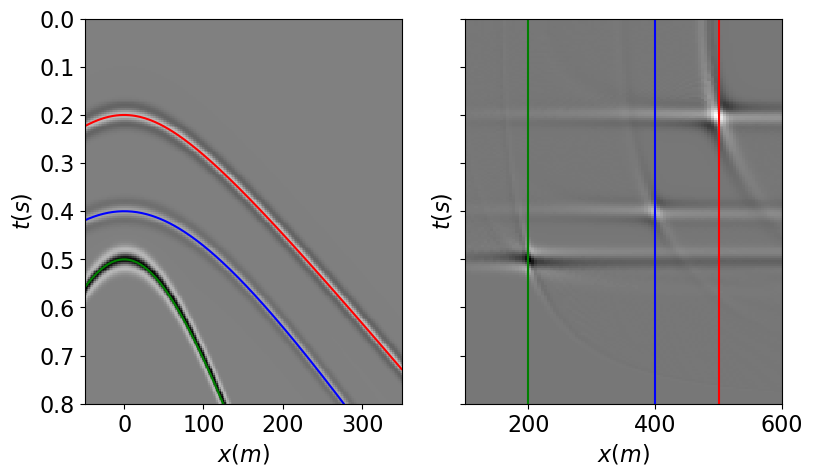

In [11]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(9, 5))
axs[0].imshow(mhypwav.T, aspect='auto', interpolation='nearest',
              vmin=-2, vmax=2, cmap='gray',
              extent=(x.min(), x.max(), t.max(), t.min()))
axs[0].plot(x, np.sqrt(t0[0]**2+x**2/vrms[0]**2), 'r')
axs[0].plot(x, np.sqrt(t0[1]**2+x**2/vrms[1]**2), 'b')
axs[0].plot(x, np.sqrt(t0[2]**2+x**2/vrms[2]**2), 'g')
axs[0].set_xlabel(r'$x(m)$')
axs[0].set_ylabel(r'$t(s)$')

axs[1].imshow(rhypwav.T, aspect='auto', interpolation='nearest',
              cmap='gray', extent=(px.min(), px.max(), t.max(), t.min()))
axs[1].axvline(vrms[0], color='r')
axs[1].axvline(vrms[1], color='b')
axs[1].axvline(vrms[2], color='g')
axs[1].set_xlabel(r'$x(m)$')
axs[1].set_ylabel(r'$t(s)$')
axs[1].set_ylim(t[-1], t[0]);

## Any shifted parabola

In [12]:
par = {'ox':-50, 'dx':2, 'nx':201,
       'oy':0, 'dy':2, 'ny':101,
       'ot':0, 'dt':0.004, 'nt':201,
       'f0': 20, 'nfmax': 210}

# Create axis
t, t2, x, y = pylops.utils.seismicevents.makeaxis(par)

# Create wavelet
wav = pylops.utils.wavelets.ricker(np.arange(41) * par['dt'],
                                   f0=par['f0'])[0]

pxx = [1e-5, 5e-6, 1e-6]
t0 = [0.2, 0.4, 0.5]
amp = [1., 0.6, -2.]

mhyp, mhypwav = pylops.utils.seismicevents.parabolic2d(x, t, t0, np.zeros(3), pxx, amp, wav)

In [13]:
npx = 101
px = np.linspace(5e-7, 2e-5, npx)

RHop = pylops.signalprocessing.Radon2D(t, x, px * par['dx'], centeredh=False,
                                       kind='parabolic', interp=False,
                                       engine='numpy')

rhypwav = RHop.H * mhypwav.ravel()
rhypwav = rhypwav.reshape(npx, par['nt'])

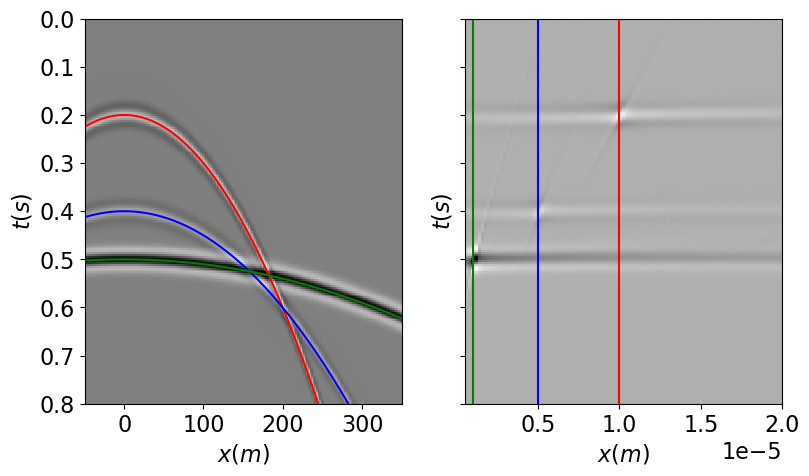

In [14]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(9, 5))
axs[0].imshow(mhypwav.T, aspect='auto', interpolation='nearest',
              vmin=-2, vmax=2, cmap='gray',
              extent=(x.min(), x.max(), t.max(), t.min()))
axs[0].plot(x, t0[0]+x**2*pxx[0], 'r')
axs[0].plot(x, t0[1]+x**2*pxx[1], 'b')
axs[0].plot(x, t0[2]+x**2*pxx[2], 'g')
axs[0].set_xlabel(r'$x(m)$')
axs[0].set_ylabel(r'$t(s)$')

axs[1].imshow(rhypwav.T, aspect='auto', interpolation='nearest',
              cmap='gray', extent=(px.min(), px.max(), t.max(), t.min()))
axs[1].axvline(pxx[0], color='r')
axs[1].axvline(pxx[1], color='b')
axs[1].axvline(pxx[2], color='g')
axs[1].set_xlabel(r'$x(m)$')
axs[1].set_ylabel(r'$t(s)$')
axs[1].set_ylim(t[-1], t[0]);

## Any shifted line

In [15]:
par = {'ox':0, 'dx':2, 'nx':201,
       'oy':0, 'dy':2, 'ny':101,
       'ot':0, 'dt':0.004, 'nt':201,
       'f0': 20, 'nfmax': 210}

# Create axis
t, t2, x, y = pylops.utils.seismicevents.makeaxis(par)

# Create wavelet
wav = pylops.utils.wavelets.ricker(np.arange(41) * par['dt'],
                                   f0=par['f0'])[0]

v = 2000
theta = [30, 40, 50]
t0 = [0.2, 0.4, 0.5]
amp = [1., 0.6, -2.]
pxx = np.sin(np.deg2rad(np.array(theta)))/v

mhyp, mhypwav = pylops.utils.seismicevents.linear2d(x, t, v, t0, theta, amp, wav)

In [16]:
npx = 101
px = np.linspace(1e-4, 9e-4, npx)
RHop = pylops.signalprocessing.Radon2D(t, x, px, centeredh=False,
                                       kind='linear', interp=False,
                                       engine='numpy')

rhypwav = RHop.H * mhypwav.ravel()
rhypwav = rhypwav.reshape(npx, par['nt'])

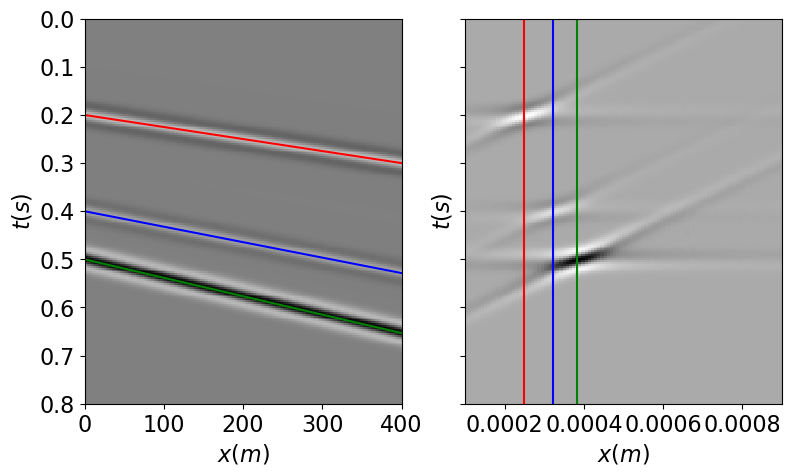

In [17]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(9, 5))
axs[0].imshow(mhypwav.T, aspect='auto', interpolation='nearest',
              vmin=-2, vmax=2, cmap='gray',
              extent=(x.min(), x.max(), t.max(), t.min()))
axs[0].plot(x, t0[0]+x*np.sin(np.deg2rad(theta[0]))/v, 'r')
axs[0].plot(x, t0[1]+x*np.sin(np.deg2rad(theta[1]))/v, 'b')
axs[0].plot(x, t0[2]+x*np.sin(np.deg2rad(theta[2]))/v, 'g')
axs[0].set_xlabel(r'$x(m)$')
axs[0].set_ylabel(r'$t(s)$')

axs[1].imshow(rhypwav.T, aspect='auto', interpolation='nearest',
              cmap='gray', extent=(px.min(), px.max(), t.max(), t.min()))
axs[1].axvline(np.sin(np.deg2rad(theta[0]))/v, color='r')
axs[1].axvline(np.sin(np.deg2rad(theta[1]))/v, color='b')
axs[1].axvline(np.sin(np.deg2rad(theta[2]))/v, color='g')
axs[1].set_xlabel(r'$x(m)$')
axs[1].set_ylabel(r'$t(s)$')
axs[1].set_ylim(t[-1], t[0]);

## Any shifted 3D hyperbola

In [18]:
par = {'ox':-50, 'dx':2, 'nx':61,
       'oy':0, 'dy':2, 'ny':51,
       'ot':0, 'dt':0.004, 'nt':201,
       'f0': 20, 'nfmax': 210}

# Create axis
t, t2, x, y = pylops.utils.seismicevents.makeaxis(par)

# Create wavelet
wav = pylops.utils.wavelets.ricker(np.arange(41) * par['dt'],
                                   f0=par['f0'])[0]

vrms = [500, 400, 200]
t0 = [0.2, 0.4, 0.5]
amp = [1., 0.6, -2.]

mhyp, mhypwav = pylops.utils.seismicevents.hyperbolic3d(x, y, t, t0, vrms, vrms, amp, wav)

In [19]:
npx = 51
px = np.linspace(100, 600, npx)

RHop = pylops.signalprocessing.Radon3D(t, y, x, px * (par['dt']/par['dx'])**2,
                                       px * (par['dt']/par['dy'])**2,centeredh=False,
                                       kind='hyperbolic', interp=False,
                                       engine='numba')


rhypwav = RHop.H * mhypwav.ravel()
rhypwav = rhypwav.reshape(npx, npx, par['nt'])

/opt/anaconda3/envs/pylops/lib/python3.9/site-packages/numba/core/typed_passes.py:334: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "../../pylops/pylops/signalprocessing/_radon3d_numba.py", line 66:
@jit(nopython=True, parallel=parallel, nogil=True)
def _create_table_numba(f, y, x, pyaxis, pxaxis, nt, npy, npx, ny, nx, interp):
^

  warnings.warn(errors.NumbaPerformanceWarning(msg,


Text(0.5, 0, '$x(m)$')

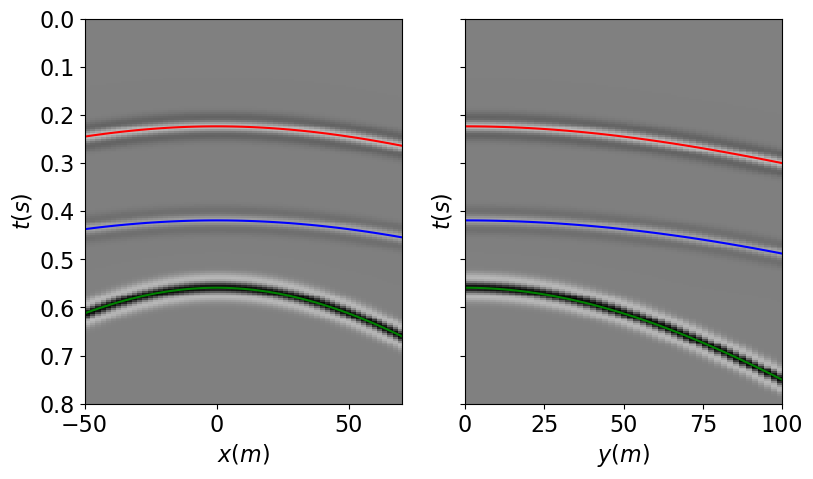

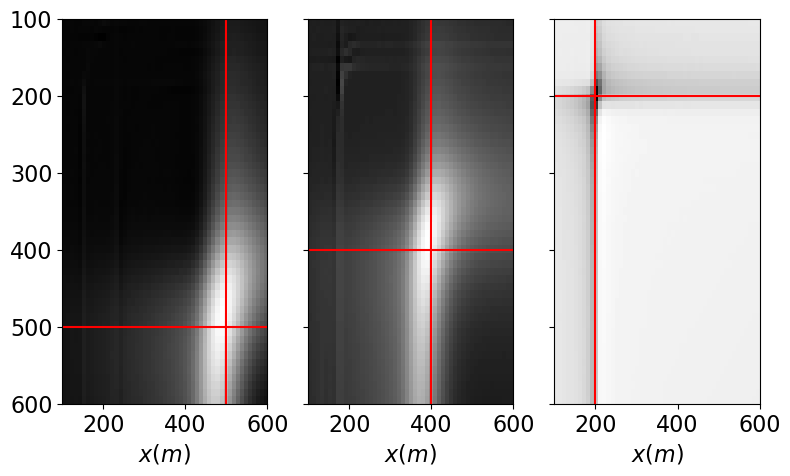

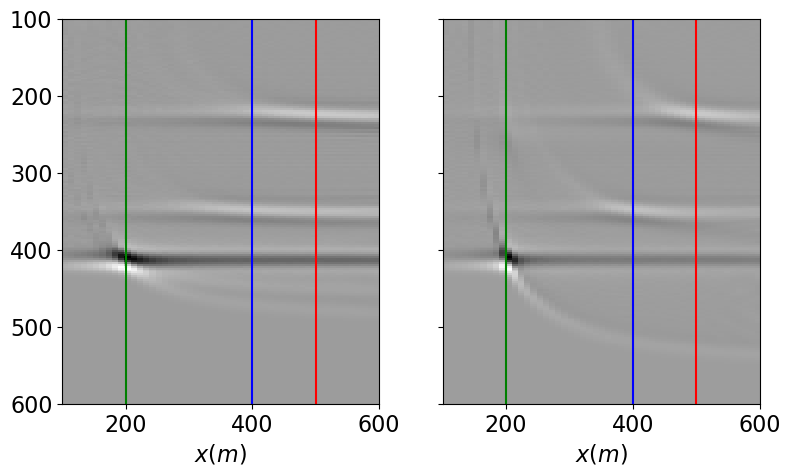

In [20]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(9, 5))
axs[0].imshow(mhypwav[25].T, aspect='auto', interpolation='nearest',
              vmin=-2, vmax=2, cmap='gray',
              extent=(x.min(), x.max(), t.max(), t.min()))
axs[0].plot(x, np.sqrt(t0[0]**2+x**2/vrms[0]**2+y[25]**2/vrms[0]**2), 'r')
axs[0].plot(x, np.sqrt(t0[1]**2+x**2/vrms[1]**2+y[25]**2/vrms[1]**2), 'b')
axs[0].plot(x, np.sqrt(t0[2]**2+x**2/vrms[2]**2+y[25]**2/vrms[2]**2), 'g')
axs[0].set_xlabel(r'$x(m)$')
axs[0].set_ylabel(r'$t(s)$')

axs[1].imshow(mhypwav[:,0].T, aspect='auto', interpolation='nearest',
              vmin=-2, vmax=2, cmap='gray',
              extent=(y.min(), y.max(), t.max(), t.min()))
axs[1].plot(y, np.sqrt(t0[0]**2+x[0]**2/vrms[0]**2+y**2/vrms[0]**2), 'r')
axs[1].plot(y, np.sqrt(t0[1]**2+x[0]**2/vrms[1]**2+y**2/vrms[1]**2), 'b')
axs[1].plot(y, np.sqrt(t0[2]**2+x[0]**2/vrms[2]**2+y**2/vrms[2]**2), 'g')
axs[1].set_xlabel(r'$y(m)$')
axs[1].set_ylabel(r'$t(s)$')

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(9, 5))
              cmap='gray', extent=(px.min(), px.max(), px.max(), px.min()))
axs[0].axvline(vrms[0], color='r')
axs[0].axhline(vrms[0], color='r')
axs[0].set_xlabel(r'$x(m)$')
axs[1].imshow(rhypwav[..., 100].T, aspect='auto', interpolation='nearest',
              cmap='gray', extent=(px.min(), px.max(), px.max(), px.min()))
axs[1].axvline(vrms[1], color='r')
axs[1].axhline(vrms[1], color='r')
axs[1].set_xlabel(r'$x(m)$')
axs[2].imshow(rhypwav[..., 125].T, aspect='auto', interpolation='nearest',
              cmap='gray', extent=(px.min(), px.max(), px.max(), px.min()))
axs[2].axvline(vrms[2], color='r')
axs[2].axhline(vrms[2], color='r')
axs[2].set_xlabel(r'$x(m)$')

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(9, 5))
axs[0].imshow(rhypwav[0].T, aspect='auto', interpolation='nearest',
              cmap='gray', extent=(px.min(), px.max(), px.max(), px.min()))
axs[0].axvline(vrms[0], color='r')
axs[0].axvline(vrms[1], color='b')
axs[0].axvline(vrms[2], color='g')
axs[0].set_xlabel(r'$x(m)$')
axs[1].imshow(rhypwav[:, 0].T, aspect='auto', interpolation='nearest',
              cmap='gray', extent=(px.min(), px.max(), px.max(), px.min()))
axs[1].axvline(vrms[0], color='r')
axs[1].axvline(vrms[1], color='b')
axs[1].axvline(vrms[2], color='g')
axs[1].set_xlabel(r'$x(m)$')